<a href="https://colab.research.google.com/github/Sairitwik21/AI-Projects-Capstone/blob/main/Fashion_MNIST_Data_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fashion MNIST Data Classification Project** 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

Step 2) Load Data

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Print the shape of data

In [3]:
X_train.shape,y_train.shape, "***************" , X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '***************', (10000, 28, 28), (10000,))

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
y_train[0]

9

In [6]:
class_labels = [ 	"T-shirt/top", "Trouser", 	"Pullover",  "Dress", 	"Coat", 	"Sandal", 	"Shirt", 	"Sneaker", 	"Bag", "Ankle boot"]

In [7]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
#show image

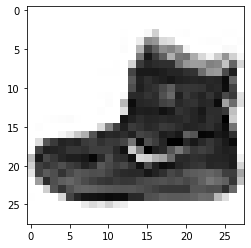

In [8]:
plt.imshow(X_train[0],cmap='Greys')

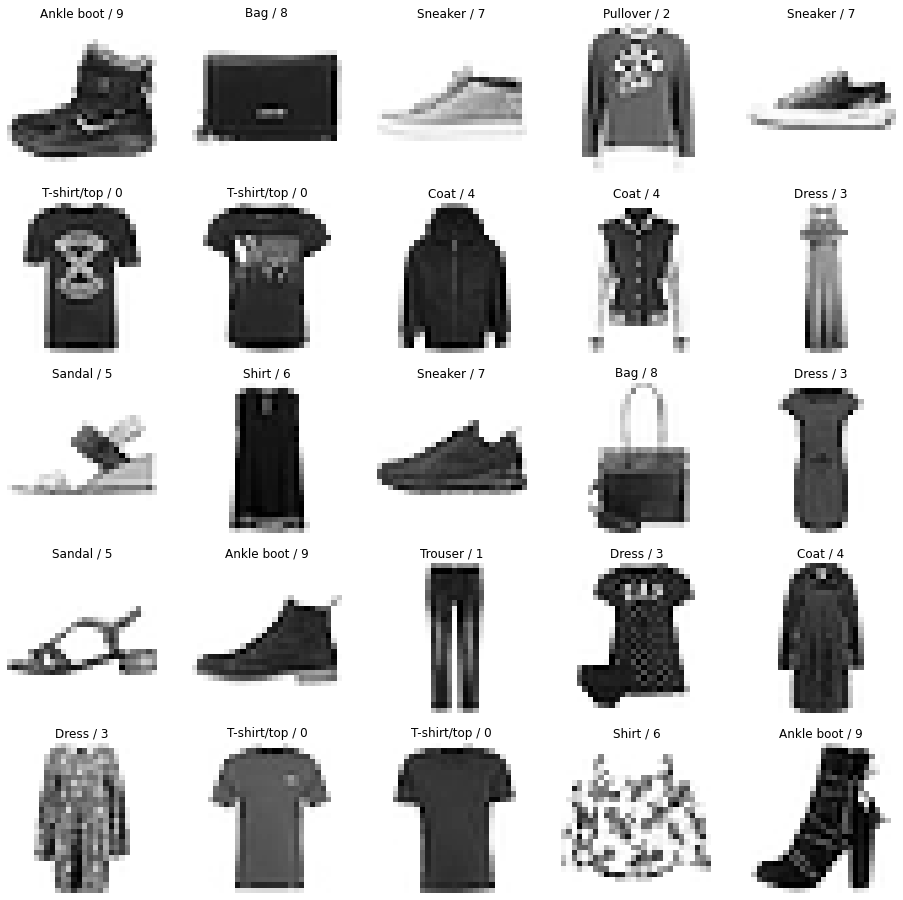

In [9]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [10]:
X_train.ndim

3

In [11]:
X_train = np.expand_dims(X_train,-1)

In [12]:
X_train.ndim

4

In [13]:
X_test=np.expand_dims(X_test,-1)

In [ ]:
# feature scaling

In [14]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
# Split dataset

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)


In [16]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

Step 3) Building the CNN Model

In [17]:
model=keras.models.Sequential([
                        keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                        keras.layers.MaxPooling2D(pool_size=(2,2)),
                        keras.layers.Flatten(),
                        keras.layers.Dense(units=128,activation='relu'),
                        keras.layers.Dense(units=10,activation='softmax'),
        ])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 20s 203ms/step - loss: 0.6280 - accuracy: 0.7857 - val_loss: 0.4298 - val_accuracy: 0.8498
Epoch 2/10
94/94 [==============================] - 19s 205ms/step - loss: 0.3825 - accuracy: 0.8666 - val_loss: 0.3644 - val_accuracy: 0.8726
Epoch 3/10
94/94 [==============================] - 19s 204ms/step - loss: 0.3337 - accuracy: 0.8835 - val_loss: 0.3430 - val_accuracy: 0.8780
Epoch 4/10
94/94 [==============================] - 19s 205ms/step - loss: 0.3076 - accuracy: 0.8903 - val_loss: 0.3159 - val_accuracy: 0.8893
Epoch 5/10
94/94 [==============================] - 19s 205ms/step - loss: 0.2809 - accuracy: 0.9005 - val_loss: 0.3154 - val_accuracy: 0.8899
Epoch 6/10
94/94 [==============================] - 19s 203ms/step - loss: 0.2664 - accuracy: 0.9046 - val_loss: 0.2979 - val_accuracy: 0.8953
Epoch 7/10
94/94 [==============================] - 19s 203ms/step - loss: 0.2506 - accuracy: 0.9091 - val_loss: 0.2911 - val_accuracy: 0.8991

In [21]:
y_pred = model.predict(X_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.98, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.08, 0.03, 0.01]], dtype=float32)

In [22]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [23]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2835 - accuracy: 0.8986


[0.2835080921649933, 0.8985999822616577]

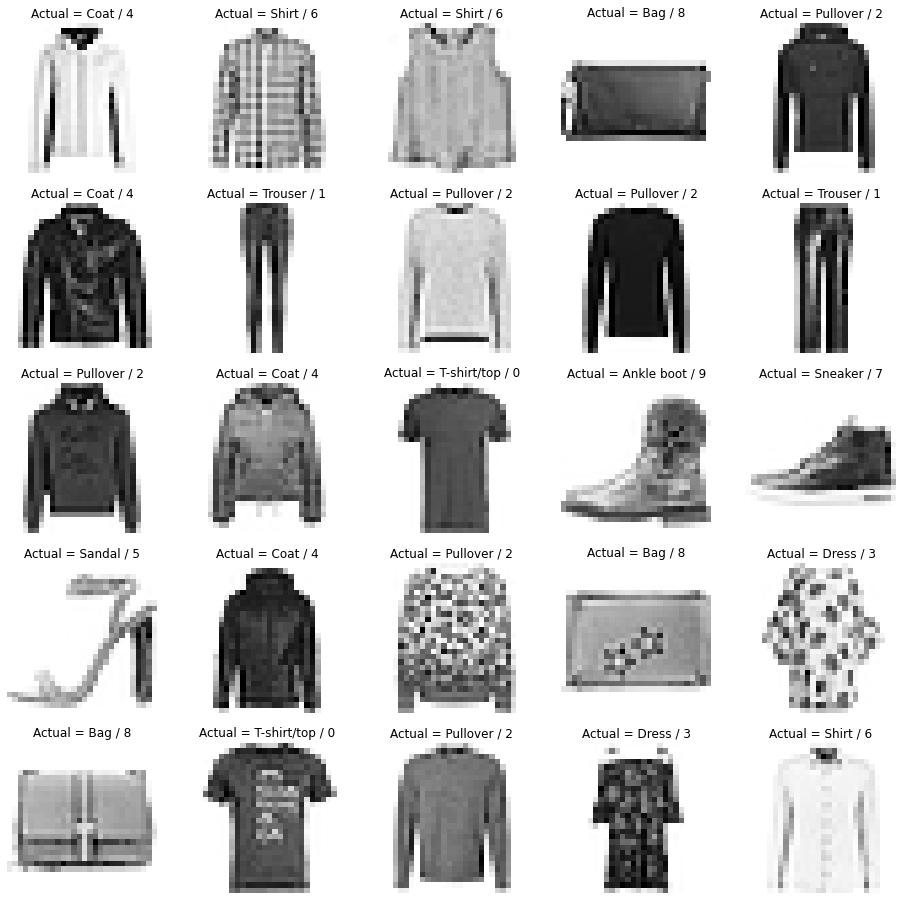

In [24]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5, 5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = "Greys")
  plt.title('Actual = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

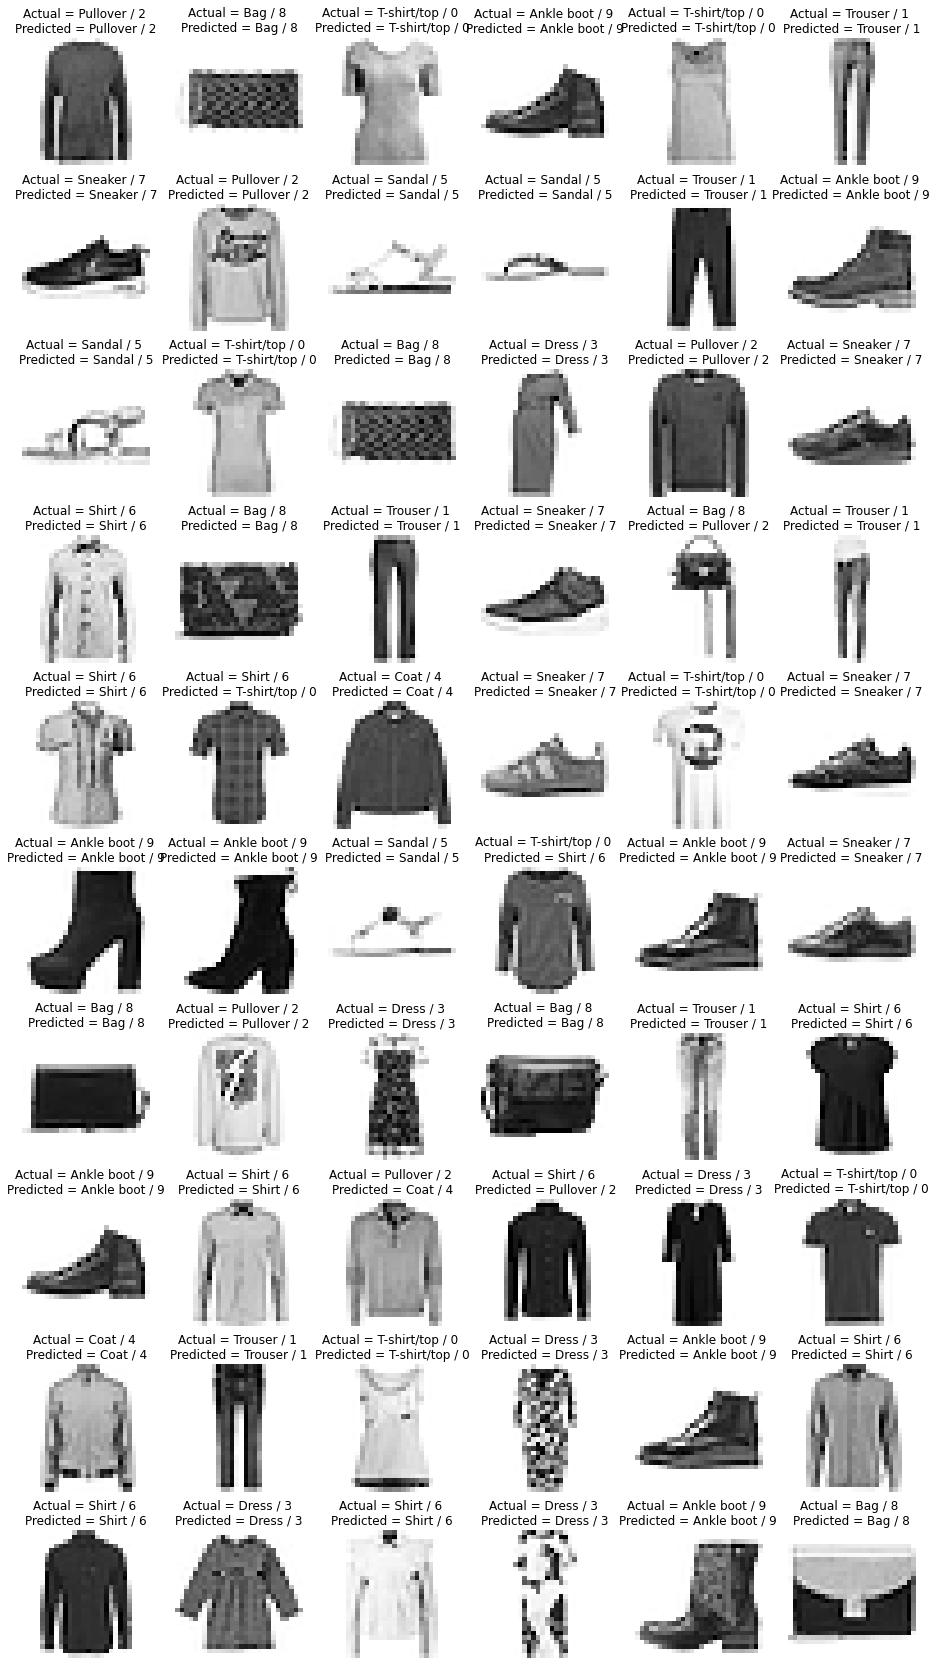

In [25]:
plt.figure(figsize=(16,30))
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = "Greys")
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')



In [ ]:
"""## Confusion Matrix"""

'## Confusion Matrix'

In [26]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels) 

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.83      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.83      0.86      0.85      1000
       Dress       0.85      0.94      0.89      1000
        Coat       0.91      0.77      0.83      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.70      0.76      0.73      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



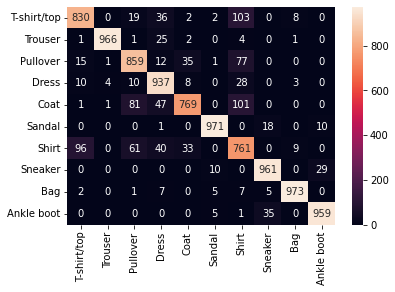

In [27]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
 
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

In [ ]:
"""# Save Model"""

'# Save Model'

In [28]:
model.save('fashion_mnist_cnn_model.h5')

**Build 2 complex CNN**

In [29]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model2.save('fashion_mnist_cnn_model2.h5')
 
"""######## very complex model"""
 
#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model3.save('fashion_mnist_cnn_model3.h5')
 
cnn_model3.evaluate(X_test, y_test)

Epoch 1/20
94/94 [==============================] - 24s 254ms/step - loss: 1.0240 - accuracy: 0.6160 - val_loss: 0.5784 - val_accuracy: 0.7778
Epoch 2/20
94/94 [==============================] - 24s 254ms/step - loss: 0.5627 - accuracy: 0.7867 - val_loss: 0.4644 - val_accuracy: 0.8276
Epoch 3/20
94/94 [==============================] - 24s 254ms/step - loss: 0.4722 - accuracy: 0.8258 - val_loss: 0.4085 - val_accuracy: 0.8503
Epoch 4/20
94/94 [==============================] - 24s 254ms/step - loss: 0.4136 - accuracy: 0.8492 - val_loss: 0.3751 - val_accuracy: 0.8629
Epoch 5/20
94/94 [==============================] - 24s 254ms/step - loss: 0.3776 - accuracy: 0.8623 - val_loss: 0.3444 - val_accuracy: 0.8731
Epoch 6/20
94/94 [==============================] - 24s 254ms/step - loss: 0.3538 - accuracy: 0.8706 - val_loss: 0.3434 - val_accuracy: 0.8742
Epoch 7/20
94/94 [==============================] - 24s 255ms/step - loss: 0.3367 - accuracy: 0.8755 - val_loss: 0.3341 - val_accuracy: 0.8781

[0.4763953685760498, 0.8982999920845032]